In [529]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sb

In [530]:
#Import Dataset
data = pd.read_csv("C:/Users/jonea/Desktop/House Prices/housing-price/train.csv", index_col=0)

In [531]:
data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  
2        0      5    2007        WD         Normal     181500  
3        0      9    2008        WD         Normal     223500  
4        0      2    2006        WD        Abnorml     140000  
5        0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [532]:
data.info()
#Variables that REALLY need to be considered (SIGNIFICANT AMOUNT MISSING)
# Alley - FireplaceQu - PoolQC - Fence - 

#Not so much a big deal
# LotFrontage - MasVnrType - MasVnrArea - BsmtQual - BsmtCond 
# BsmtExposure - BsmtFinType1 - BsmtFinType2 - Electrical 
# GarageType - GarageYrBlt - GarageFinish - GarageQual - GarageCond

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [533]:
#Droping Variable that have very little significance and little 'non-null values'
data = data.drop(['Alley', 'PoolQC', 'Fence'], axis=1)

In [534]:
data.head(10)

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
Id                                                                          
1           60       RL         65.0     8450   Pave      Reg         Lvl   
2           20       RL         80.0     9600   Pave      Reg         Lvl   
3           60       RL         68.0    11250   Pave      IR1         Lvl   
4           70       RL         60.0     9550   Pave      IR1         Lvl   
5           60       RL         84.0    14260   Pave      IR1         Lvl   
6           50       RL         85.0    14115   Pave      IR1         Lvl   
7           20       RL         75.0    10084   Pave      Reg         Lvl   
8           60       RL          NaN    10382   Pave      IR1         Lvl   
9           50       RM         51.0     6120   Pave      Reg         Lvl   
10         190       RL         50.0     7420   Pave      Reg         Lvl   

   Utilities LotConfig LandSlope  ... 3SsnPorch ScreenPorch PoolArea  \
Id                                ...                                  
1     AllPub    Inside       Gtl  ...         0           0        0   
2     AllPub       FR2       Gtl  ...         0           0        0   
3     AllPub    Inside       Gtl  ...         0           0        0   
4     AllPub    Corner       Gtl  ...         0           0        0   
5     AllPub       FR2       Gtl  ...         0           0        0   
6     AllPub    Inside       Gtl  ...       320           0        0   
7     AllPub    Inside       Gtl  ...         0           0        0   
8     AllPub    Corner       Gtl  ...         0           0        0   
9     AllPub    Inside       Gtl  ...         0           0        0   
10    AllPub    Corner       Gtl  ...         0           0        0   

   MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
Id                                                                         
1          NaN       0       2    2008        WD         Normal    208500  
2          NaN       0       5    2007        WD         Normal    181500  
3          NaN       0       9    2008        WD         Normal    223500  
4          NaN       0       2    2006        WD        Abnorml    140000  
5          NaN       0      12    2008        WD         Normal    250000  
6         Shed     700      10    2009        WD         Normal    143000  
7          NaN       0       8    2007        WD         Normal    307000  
8         Shed     350      11    2009        WD         Normal    200000  
9          NaN       0       4    2008        WD        Abnorml    129900  
10         NaN       0       1    2008        WD         Normal    118000  

[10 rows x 77 columns]

In [535]:
#NOT SURE WHAT TO DO FOR MSSubClass, MSZoning, 

In [536]:
#Replace Null values with median (69)
mean1 = data['LotFrontage'].median()
data['LotFrontage'].fillna(value = mean1, inplace=True)

In [537]:
#Remove 'Street' b/c only 6 of 1460 are Grvl
data = data.drop('Street', axis=1)

In [538]:
data.LotShape.value_counts()
#Probably won't change anything unless decide to combine IR2 and IR3 to make one variable

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [539]:
data.LandContour.value_counts()
#Probably won't change unless decide to only make 2 variables, Lvl and NOT lvl.

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [540]:
data.Utilities.value_counts()
#Because every entry except 1 is 'AllPub' there is negligible singificance, therefore, will be removed
data = data.drop('Utilities', axis=1)

In [541]:
data.LotConfig.value_counts()
#No changes

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [542]:
data.LandSlope.value_counts()
#Thinking of combining 'LandSlope' & 'LandContour'
#Create 2 variables, if 'Gtl' and 'Lvl' then FLAT otherwise, NOTFLAT

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [543]:
def Level(data):
    if (data['LandContour'] == 'Lvl') & (data['LandSlope'] == 'Gtl'):
        return 0
    else:
        return 1
data['LandLevel'] = data.apply(Level, axis=1)

In [544]:
data.LandLevel.value_counts()
#0 rep. Level surface
#1 rep. NOT Level surface

0    1294
1     166
Name: LandLevel, dtype: int64

In [545]:
#Dropped LandContour and LandSlope because LandLevel was created to concat them
data = data.drop(['LandContour', 'LandSlope'], axis=1)

In [546]:
data.Neighborhood.value_counts()
#Nothing to change for Neighborhood

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [547]:
#Creating new column that concats Condition1 and Condition2
#If Condition = 0, Normal
#If Condition = 1, Not Normal
def Condition(data):
    if (data.Condition1 == 'Norm'):
        return 0
    else:
        return 1
data['Condition'] = data.apply(Condition, axis=1)


In [548]:
#Dropping Condition1 and Condition2 bc Condition was created
data = data.drop(['Condition1','Condition2'], axis = 1)

In [549]:
data.BldgType.value_counts()
#Don't think any changes need to be made

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [550]:
data.HouseStyle.describe()
#Don't think any changes need to be made

count       1460
unique         8
top       1Story
freq         726
Name: HouseStyle, dtype: object

In [551]:
data.OverallQual.value_counts(ascending=True)
#data.OverallQual.describe()
#Strong Correlation Variable

1       2
2       3
10     18
3      20
9      43
4     116
8     168
7     319
6     374
5     397
Name: OverallQual, dtype: int64

In [552]:
data.OverallCond.value_counts(ascending=True)
#data.OverallCond.describe()
#Thinking about combining OverallCond and OverallQual but not sure if worth it

1      1
2      5
9     22
3     25
4     57
8     72
7    205
6    252
5    821
Name: OverallCond, dtype: int64

In [553]:
#Created 4 different sections [(1872-1953),(1954-1972),(1973-1999),(2000-2010)]
#Outputs are 1,2,3,4 respectively
def YrBuilt(data):
    if (data.YearBuilt >= 1872 and data.YearBuilt <= 1953):
        return 1
    elif (data.YearBuilt >= 1954 and data.YearBuilt <= 1972):
        return 2
    elif (data.YearBuilt >= 1973 and data.YearBuilt <= 1999):
        return 3
    else:
        return 4
data['YrBuilt'] = data.apply(YrBuilt, axis = 1)

In [554]:
data = data.drop('YearBuilt', axis = 1)

In [555]:
#Created new variable 'Remodel'
#0 if no remodel, otherwise 1
def Remodel(data):
    if (data.YearBuilt == data.YearRemodAdd):
        return 0
    else:
        return 1
data['Remodel'] = data.apply(Remodel, axis = 1)

AttributeError: 'Series' object has no attribute 'YearBuilt'

In [ ]:
#Dropping 'YearRemodAdd' because 'Remodel' replaced it
data = data.drop('YearRemodAdd', axis = 1)

In [ ]:
data.RoofStyle.value_counts()
#Nothing to change

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [ ]:
data.RoofMatl.value_counts()
#Nothing to change
#Could combine RoofMatl and RoofStyle but not sure what it would do.

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

In [ ]:
data.Exterior1st.describe()
data.Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [ ]:
data.Exterior2nd.describe()
data.Exterior2nd.value_counts()
#Every house has 2 matrials used?
#Can't think of anything to change

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [ ]:
#Replacing Null values with 'None' 
data.MasVnrType.fillna('None', inplace=True)

In [ ]:
#Replacing Null values with 0
data.MasVnrArea.fillna('0', inplace=True)

In [ ]:
#data.ExterQual.value_counts()
#data.ExterQual.describe()
#data.ExterCond.value_counts()
#Don't think I need to make any changes to either ExterCond or ExterQual

In [ ]:
data.Foundation.value_counts()
#data.Foundation.describe()
#Nothing to change here

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [ ]:
data.BsmtQual.value_counts()
#Missing 37 values
#Not sure what to do with 37 missing values

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [ ]:
data.BsmtCond.value_counts()
#Also missing 37 values
#Could remove 37 rows that have the null using 
#df = df.dropna(how='any',axis=0) but this will shrink sample size by 37 entries which can be significant

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [ ]:
data.BsmtExposure.describe()
data.BsmtExposure.value_counts()
#38 missing values, something needs to be done with the basement variables

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [ ]:
#Replacing Null values with 'Unf'
data.BsmtFinType1.fillna('Unf', inplace=True)

In [ ]:
data.BsmtFinSF1.value_counts()
#Nothing to be changed

0       467
24       12
16        9
686       5
662       5
       ... 
1338      1
1324      1
1460      1
328       1
830       1
Name: BsmtFinSF1, Length: 637, dtype: int64

In [ ]:
#Replacing Null values with 'Unf'
data.BsmtFinType2.fillna('Unf', inplace=True)

In [ ]:
data.BsmtFinSF2.describe()
#Almost all entries for SF of basement is 0
#Almost no one has a second type of finish in their basement

count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64

In [ ]:
data.BsmtUnfSF.describe()

count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
25%       223.000000
50%       477.500000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64

In [ ]:
data.TotalBsmtSF.describe()
#Nothing to change here

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

In [ ]:
data.Heating.value_counts()
#Nothing to change

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [ ]:
data.HeatingQC.value_counts()
#Nothing to change

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [ ]:
#Changing Y and N to 1 and 0, respectively
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
data.CentralAir = lab_enc.fit_transform(data.CentralAir)

In [ ]:
#Replacing null values with 'SBrkr'
data.Electrical.fillna('SBrkr', inplace=True)

In [ ]:
data['1stFlrSF'].describe()
#Nothing to change

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64

In [ ]:
data['2ndFlrSF'].describe()
#Nothing to change

count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64

In [ ]:
data.LowQualFinSF.describe()
#Nothing to change

count    1460.000000
mean        5.844521
std        48.623081
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64

In [ ]:
data.GrLivArea.describe()
#Seems weird, is this floor 1 + floor 2 SQFT?

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

In [ ]:
data.BsmtFullBath.value_counts()
#Nothing to change

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

In [ ]:
data.BsmtHalfBath.value_counts()
#Nothing to change

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

In [ ]:
data.FullBath.value_counts()
#Nothing to change

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

In [ ]:
data.HalfBath.value_counts()
#Nothing to change

0    913
1    535
2     12
Name: HalfBath, dtype: int64

In [ ]:
data.BedroomAbvGr.describe()
#Nothing to change

count    1460.000000
mean        2.866438
std         0.815778
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64

In [ ]:
data.KitchenAbvGr.describe()
#Nothing to change

count    1460.000000
mean        1.046575
std         0.220338
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64

In [ ]:
data.KitchenQual.value_counts()
#Nothing to change

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [ ]:
data.TotRmsAbvGrd.value_counts(ascending=True)
#Nothing to change, seems like a lot of variables, however, are very similar, if not repeats.

2       1
14      1
12     11
3      17
11     18
10     47
9      75
4      97
8     187
5     275
7     329
6     402
Name: TotRmsAbvGrd, dtype: int64

In [ ]:
data.Functional.value_counts()
#Not sure what this variable even means, might remove it
#Or change the outputs as 0,1,2,3 from typical functionality to severe respectively

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [ ]:
data.Fireplaces.value_counts()
#Nothing to change

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [ ]:
data.FireplaceQu.unique()
#Even though there are only 770 entries, the remainder are given NA (which is an option)
#Nothing to change

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [ ]:
data.GarageType.value_counts()
#81 homes have no garage
#Nothing to change

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [ ]:
data.GarageYrBlt.describe()
#81 missing values, likely the 81 homes with no garage
#Nothing to change

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [ ]:
data.GarageFinish.value_counts()
#Nothing to change
#May have to change the nan to 'NA' through .fillna but not sure yet.

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [ ]:
data.GarageCars.value_counts()
#Nothing to change

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [ ]:
data.GarageArea.describe()
#Nothing to change

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

In [ ]:
data.GarageQual.describe()
#81 homes have no garage
#nothing to change

count     1379
unique       5
top         TA
freq      1311
Name: GarageQual, dtype: object

In [ ]:
data.GarageCond.describe()
#Garage Cond is essentially the same as garage qual so we will eliminate GarageCond
data = data.drop('GarageCond', axis=1)

In [ ]:
data.PavedDrive.value_counts()
#nothing to change

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [ ]:
#Changing to whether property has a deck or not
# 1 = yes
# 0 = no
def deck(data):
    if (data['WoodDeckSF'] == '0'):
        return 0
    else:
        return 1
data['WoodDeck'] = data.apply(deck, axis=1)

In [ ]:
#Dropping 'WoodDeckSF' bc 'WoodDeck' was created 
data = data.drop('WoodDeckSF', axis = 1)

In [ ]:
#Changing OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea to whether the home has one or not.
# 1 = yes
# 0 = no
def OpPorch(data):
    if (data['OpenPorchSF'] == '0'):
        return 0
    else:
        return 1
data['OpenPorch'] = data.apply(OpPorch, axis=1)

def EnPorch(data):
    if (data['EnclosedPorch'] == '0'):
        return 0
    else:
        return 1
data['EnPorch'] = data.apply(EnPorch, axis=1)

def ThrsPorch(data):
    if (data['3SsnPorch'] == '0'):
        return 0
    else:
        return 1
data['3SPorch'] = data.apply(ThrsPorch, axis=1)

def ScPorch(data):
    if (data['ScreenPorch'] == '0'):
        return 0
    else:
        return 1
data['ScPorch'] = data.apply(ScPorch, axis=1)

def PoolAr(data):
    if (data['PoolArea'] == '0'):
        return 0
    else:
        return 1
data['PoolAr'] = data.apply(PoolAr, axis=1)


In [ ]:
data = data.drop(['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea'], axis = 1)

In [ ]:
#Changing to whether a home has a MiscFeature (Elevator, Shed, 2ndGarage, TennisCourt)
data.MiscFeature = data.MiscFeature.fillna('NaN')

In [ ]:
#Creating a new Column 'MiscFeat' 0 vs 1 whether there is a feature or not.
def Misc(data):
    if (data.MiscFeature == 'NaN'):
        return 0
    else:
        return 1

data['MiscFeat'] = data.apply(Misc, axis=1)

In [ ]:
#Dropping Column 'MiscFeature'
data = data.drop('MiscFeature', axis=1)

In [ ]:
#Nothing to change for MiscVal

In [ ]:
#Nothing to change for this variable
data.MoSold.value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

In [ ]:
#Data of homes ranges between the years 2006 and 2010 in the state of Iowa
data.YrSold.value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [ ]:
#Don't think I need to change anything here
data.SaleType.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [ ]:
#Nothing to change here
data.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [ ]:
#Find Independent Column Correlations
def correlation(dataset,threshold):
    col_corr= [] # List of correlated columns
    corr_matrix=dataset.corr() #finding correlation between columns
    for i in range (len(corr_matrix.columns)): #Number of columns
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking correlation between columns
                colName=(corr_matrix.columns[i], corr_matrix.columns[j]) #getting correlated columns
                col_corr.append(colName) #adding correlated column name
    return col_corr #returning set of column names
col=correlation(data,0.7)
print('Correlated columns @ 0.7:', col)

#Checking correlation level greater than 0.7. Most are likely to be multicollinearity
#Important ones to consider @ 0.7 : ('SalePrice', 'OverallQual') & ('SalePrice', 'GrLivArea'),
#Important ones to consider @ 0.6 : ('SalePrice', 'TotalBsmtSF'), ('SalePrice', '1stFlrSF'),  ('SalePrice', 'GarageCars'), ('SalePrice', 'GarageArea')]

Correlated columns @ 0.7: [('OverallQual', 'SalePrice'), ('1stFlrSF', 'TotalBsmtSF'), ('GrLivArea', 'SalePrice'), ('TotRmsAbvGrd', 'GrLivArea'), ('GarageYrBlt', 'YearBuilt'), ('GarageArea', 'GarageCars'), ('YrBuilt', 'YearBuilt'), ('YrBuilt', 'GarageYrBlt')]


In [ ]:
#Moving Location of 'SalePrice' to position 0
column_to_move = data.pop('SalePrice')
data.insert(0, 'SalePrice', column_to_move)

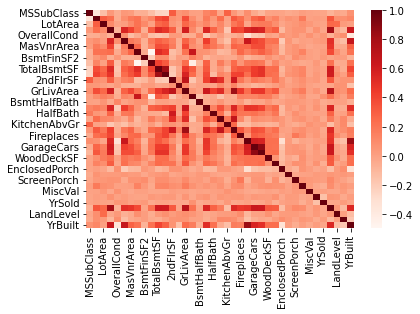

In [559]:
#Correlation Heatmap

dataplot = sb.heatmap(data.corr(), cmap='Reds', cbar=True)